In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import statsmodels.api as sm
from tools import progbar

In [2]:
# File created: Jan. 5 2019
# Tutorial Reference
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [3]:
# Dataset:
# Consumer Price Index for All Urban Consumers: All Items
# Citation:
# U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], 
# retrieved from FRED, Federal Reserve Bank of St. Louis;
# https://fred.stlouisfed.org/series/CPIAUCSL, January 4, 2019.

In [4]:
import datetime
# Timeit module.
def timeit(method):
    def timed(*args, **kw):
        ts = datetime.datetime.now()
        result = method(*args, **kw)
        te = datetime.datetime.now()
        print(f"Time: {te - ts}")
        return result
    return timed

In [5]:
df = pd.read_csv("./data/CPIAUCSL.csv", index_col=0, parse_dates=True)
# df["DATE"] = pd.to_datetime(df["DATE"])
df.columns = ["CPI"]
print(df.dtypes)
df.head()
# month_df = df.resample("M").mean().head()

CPI    float64
dtype: object


,CPI
DATE,
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
1947-06-01,22.08


In [6]:
# 1st order differencing.
d1 = df.diff()
d1.dropna(inplace=True)
d1.head()

,CPI
DATE,
1947-03-01,0.38
1947-04-01,0.00
1947-05-01,-0.05
1947-06-01,0.13
1947-07-01,0.15


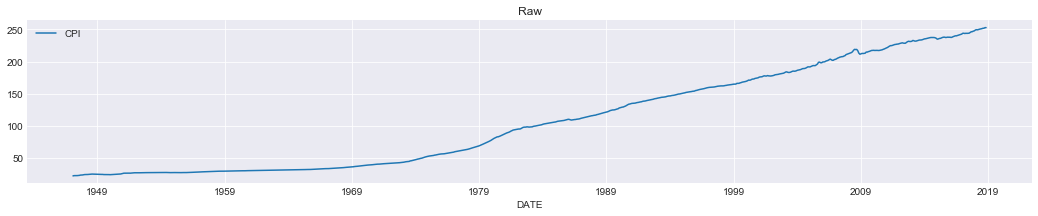

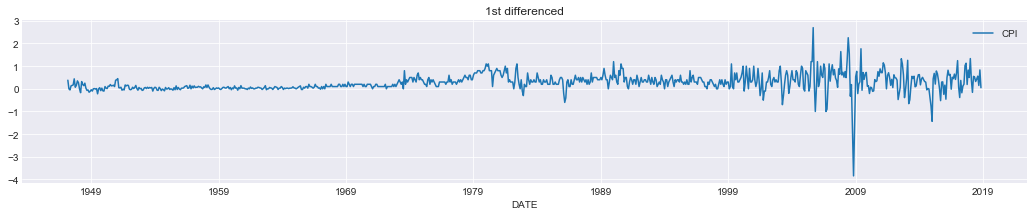

In [7]:
df.plot(figsize=(18, 3), grid=True)
plt.title("Raw")
plt.show()
d1.plot(figsize=(18, 3), grid=True)
plt.title("1st differenced")
plt.show()

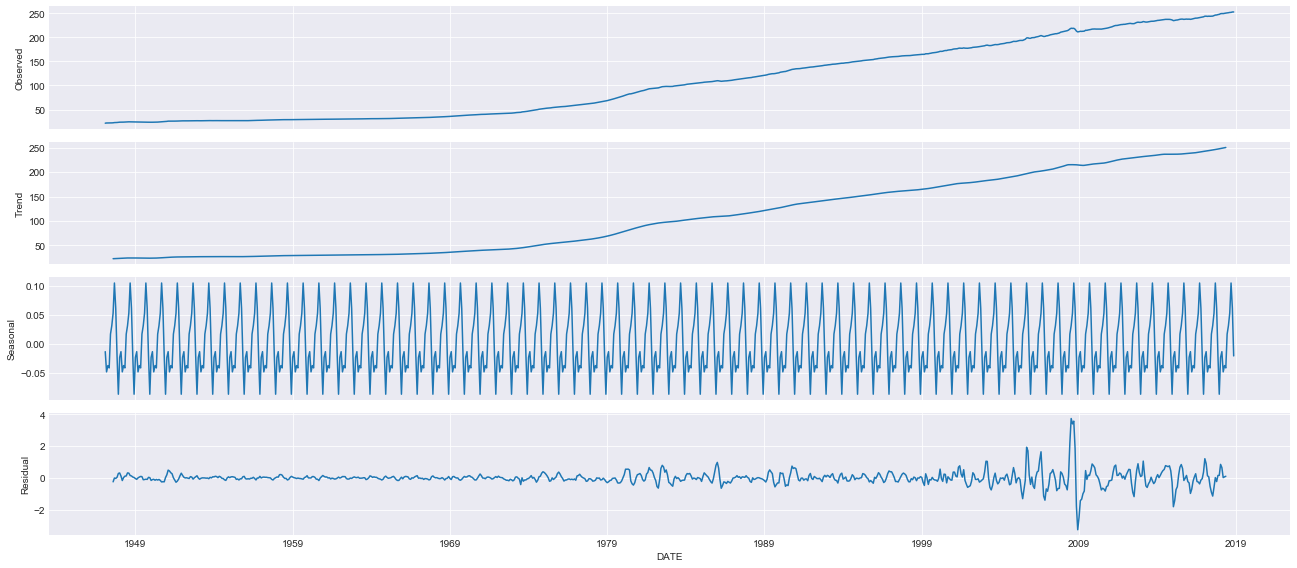

In [8]:
from pylab import rcParams
rcParams["figure.figsize"] = (18, 8)
rcParams["axes.grid"] = True
decomposition = sm.tsa.seasonal_decompose(df, model="additive")
fig = decomposition.plot()
plt.show()

In [9]:
# # Grid Searching for Parameters
# p = d = q = range(3)
# pdq_set = tuple(itertools.product(p, d, q))
# seasonal_pdq_set = (
#     (x[0], x[1], x[2], 12)
#     for x in list(itertools.product(p, d, q))
# )
# candidates = list()

# for param in pdq_set:
#     for param_seasonal in seasonal_pdq_set:
#         model = sm.tsa.statespace.SARIMAX(
#             df,
#             order=param,
#             seasonal_order=param_seasonal,
#             enforce_stationarity=False,
#             enforce_invertibility=False,
#             freq="MS"
#         )
#         results = model.fit()
#         candidates.append({
#             "pdq": param,
#             "seasonal_pdq": param_seasonal,
#             "aic":results.aic
#         })
#         print(f"ARIMA{param}x{param_seasonal} - AIC:{results.aic}")

In [10]:
# Grid Searching for Parameters
p = q = range(10)
d = [1]
pdq_set = tuple(itertools.product(p, d, q))
candidates = list()

for (i, param) in enumerate(pdq_set):
    progbar(i+1, len(pdq_set), max(len(pdq_set), 30))
    try:
        model = sm.tsa.statespace.SARIMAX(
            df,
            order=param,
            enforce_stationarity=False,
            enforce_invertibility=False,
            freq="MS"
        )
        results = model.fit()
        candidates.append({
            "pdq": param,
            "aic": results.aic
        })
#         print(f"ARIMA{param} - AIC:{results.aic}")
    except:
        continue

 ####------------------------------------------------------------------------------------------------ [4/100,   4.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


 ############################------------------------------------------------------------------------ [28/100,  28.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##############################---------------------------------------------------------------------- [30/100,  30.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #################################------------------------------------------------------------------- [33/100,  33.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##################################------------------------------------------------------------------ [34/100,  34.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###################################----------------------------------------------------------------- [35/100,  35.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #####################################--------------------------------------------------------------- [37/100,  37.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ######################################-------------------------------------------------------------- [38/100,  38.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #######################################------------------------------------------------------------- [39/100,  39.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ########################################------------------------------------------------------------ [40/100,  40.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ############################################-------------------------------------------------------- [44/100,  44.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #############################################------------------------------------------------------- [45/100,  45.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##############################################------------------------------------------------------ [46/100,  46.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###############################################----------------------------------------------------- [47/100,  47.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ################################################---------------------------------------------------- [48/100,  48.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #################################################--------------------------------------------------- [49/100,  49.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##################################################-------------------------------------------------- [50/100,  50.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ####################################################------------------------------------------------ [52/100,  52.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ######################################################---------------------------------------------- [54/100,  54.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #######################################################--------------------------------------------- [55/100,  55.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ########################################################-------------------------------------------- [56/100,  56.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #########################################################------------------------------------------- [57/100,  57.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##########################################################------------------------------------------ [58/100,  58.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###########################################################----------------------------------------- [59/100,  59.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ############################################################---------------------------------------- [60/100,  60.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##############################################################-------------------------------------- [62/100,  62.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###############################################################------------------------------------- [63/100,  63.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ################################################################------------------------------------ [64/100,  64.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #################################################################----------------------------------- [65/100,  65.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##################################################################---------------------------------- [66/100,  66.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###################################################################--------------------------------- [67/100,  67.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ####################################################################-------------------------------- [68/100,  68.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #####################################################################------------------------------- [69/100,  69.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ######################################################################------------------------------ [70/100,  70.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ########################################################################---------------------------- [72/100,  72.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #########################################################################--------------------------- [73/100,  73.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##########################################################################-------------------------- [74/100,  74.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###########################################################################------------------------- [75/100,  75.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ############################################################################------------------------ [76/100,  76.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #############################################################################----------------------- [77/100,  77.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##############################################################################---------------------- [78/100,  78.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###############################################################################--------------------- [79/100,  79.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ################################################################################-------------------- [80/100,  80.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##################################################################################------------------ [82/100,  82.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###################################################################################----------------- [83/100,  83.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ####################################################################################---------------- [84/100,  84.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #####################################################################################--------------- [85/100,  85.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ######################################################################################-------------- [86/100,  86.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #######################################################################################------------- [87/100,  87.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ########################################################################################------------ [88/100,  88.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #########################################################################################----------- [89/100,  89.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##########################################################################################---------- [90/100,  90.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ############################################################################################-------- [92/100,  92.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #############################################################################################------- [93/100,  93.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##############################################################################################------ [94/100,  94.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###############################################################################################----- [95/100,  95.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ################################################################################################---- [96/100,  96.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #################################################################################################--- [97/100,  97.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ##################################################################################################-- [98/100,  98.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ###################################################################################################- [99/100,  99.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 #################################################################################################### [100/100, 100.00%]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
candidates.sort(key=lambda x:x["aic"])
from pprint import pprint
pprint(candidates[:5])
best_param = candidates[0]["pdq"]

[{'aic': 467.11841608757095, 'pdq': (9, 1, 9)},
 {'aic': 471.334510854546, 'pdq': (9, 1, 7)},
 {'aic': 472.4983434075807, 'pdq': (9, 1, 8)},
 {'aic': 474.02743051404826, 'pdq': (6, 1, 8)},
 {'aic': 483.61282076626645, 'pdq': (9, 1, 6)}]


In [12]:
# Fitting Seasonal ARIMA
model = sm.tsa.statespace.SARIMAX(
    df,
    order=best_param,
    enforce_stationarity=False,
    enforce_invertibility=False,
    freq="MS"
)

results = model.fit()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [13]:
# print(results.summary())

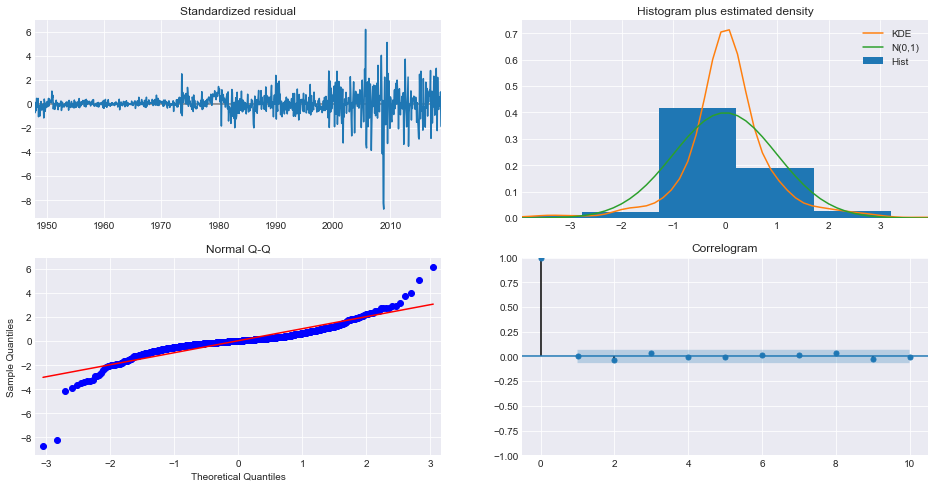

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [15]:
pred = results.get_prediction(start=pd.to_datetime("2000-01-01"), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.columns

Index(['lower CPI', 'upper CPI'], dtype='object')

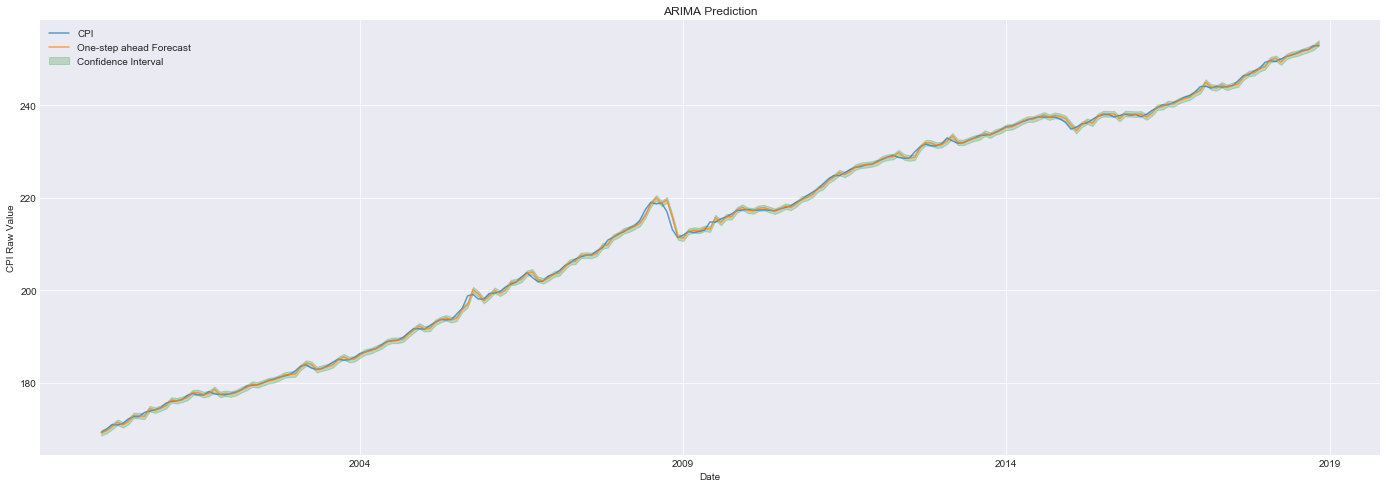

In [16]:
rcParams["figure.figsize"] = (24, 8)
ax = df[pd.to_datetime("2000-01-01"):].plot(label="observed", alpha=.7)
pred.predicted_mean.plot(ax=ax, label="One-step ahead Forecast", alpha=.7)
ax.fill_between(
    pred_ci.index,
    pred_ci["lower CPI"],
    pred_ci["upper CPI"],
    color="green",
    alpha=.2,
    label="Confidence Interval"
)
ax.set_xlabel("Date")
ax.set_ylabel("CPI Raw Value")
plt.title("ARIMA Prediction")
plt.legend()
plt.show()

In [17]:
predicted = pred.predicted_mean.values
observed = np.squeeze(df["2000-01-01":].values)
rmse = np.sqrt(np.mean(
    (predicted - observed) ** 2
))
print(rmse)

0.5321362021840327


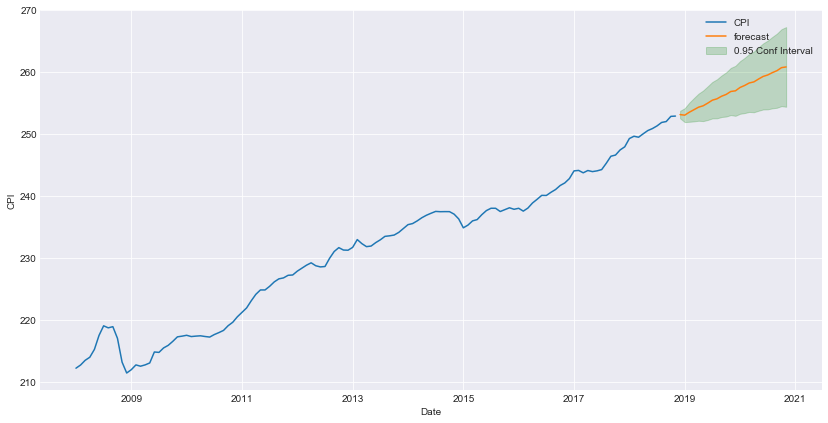

In [18]:
# Forecasting
alpha = 0.05
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int(alpha=alpha)

ax = df["2008-01-01":].plot(
    label="observed", figsize=(14, 7)
)
pred_uc.predicted_mean.plot(ax=ax, label="forecast")
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],  # Lower CI
    pred_ci.iloc[:, 1],  # Upper CI
    color="green",
    alpha=0.2,
    label=f"{1-alpha} Conf Interval"
)
ax.set_xlabel("Date")
ax.set_ylabel("CPI")

plt.legend()
plt.show()